# 1. Чтение и подготовка данных

In [271]:
!wget https://www.dropbox.com/s/s4qj0fpsn378m2i/chgk.zip
!unzip chgk.zip

--2020-06-12 17:02:02--  https://www.dropbox.com/s/s4qj0fpsn378m2i/chgk.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s4qj0fpsn378m2i/chgk.zip [following]
--2020-06-12 17:02:02--  https://www.dropbox.com/s/raw/s4qj0fpsn378m2i/chgk.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf53dbcef59a72d795bf0bbacf1.dl.dropboxusercontent.com/cd/0/inline/A5j7ooYS-b_Oh3rWyyLa8UuoqT0RvYSSX5A7dlh0Re2pllpqI645g47przIuogePxHYKPgvzmC-tjA-pnQcsXRoShgYOa3uoSWqxDYREpPtUM3-ZmASckQmyHsWTLFOKiv8/file# [following]
--2020-06-12 17:02:02--  https://ucf53dbcef59a72d795bf0bbacf1.dl.dropboxusercontent.com/cd/0/inline/A5j7ooYS-b_Oh3rWyyLa8UuoqT0RvYSSX5A7dlh0Re2pllpqI645g47przIuogePxHYKPgvzmC-tjA-pnQcsXRoShgYOa3uoSWqxDYREpPtUM3-ZmASckQmyHsWTLF

In [0]:
import pickle
with open("results.pkl", "rb") as f:
  results = pickle.load(f)
with open("tournaments.pkl", "rb") as f:
  tournaments = pickle.load(f)

In [0]:
import os
import numpy as np
import pandas as pd

In [0]:
# фильтруем игры 2019 и 2020 года
results_upd = defaultdict(list)
tournaments_upd = {}

for id, value in results.items():
  y = int(tournaments[id]["dateStart"][0:4])
  if y in [2019, 2020]:
    for team in value:
      mask = team.get("mask", None)
      team_members = team.get("teamMembers", [])
      if mask and team_members:
        results_upd[id].append(team)
  else:
    continue

tournaments_upd = {k: tournaments[k] for k, v in results_upd.items()}
results, tournaments = dict(results_upd), tournaments_upd

In [275]:
results[4772]

[{'controversials': [{'answer': 'Мьёльнир',
    'appealJuryComment': None,
    'comment': '',
    'id': 91169,
    'issuedAt': '2019-01-06T13:28:48+03:00',
    'questionNumber': 15,
    'resolvedAt': '2019-01-06T15:25:54+03:00',
    'status': 'A'}],
  'current': {'name': 'Рабочее название',
   'town': {'id': 285, 'name': 'Санкт-Петербург'}},
  'flags': [],
  'mask': '111111111011111110111111111100010010',
  'position': 1,
  'questionsTotal': 28,
  'synchRequest': {'id': 56392,
   'venue': {'id': 3030, 'name': 'Санкт-Петербург'}},
  'team': {'id': 45556,
   'name': 'Рабочее название',
   'town': {'id': 285, 'name': 'Санкт-Петербург'}},
  'teamMembers': [{'flag': 'Б',
    'player': {'id': 6212,
     'name': 'Юрий',
     'patronymic': 'Яковлевич',
     'surname': 'Выменец'},
    'rating': 13507,
    'usedRating': 13507},
   {'flag': 'Б',
    'player': {'id': 18332,
     'name': 'Александр',
     'patronymic': 'Витальевич',
     'surname': 'Либер'},
    'rating': 13185,
    'usedRating': 1

In [276]:
tournaments[4772]

{'dateEnd': '2019-01-09T19:00:00+03:00',
 'dateStart': '2019-01-05T19:00:00+03:00',
 'id': 4772,
 'name': 'Синхрон северных стран. Зимний выпуск',
 'orgcommittee': [{'id': 28379,
   'name': 'Константин',
   'patronymic': 'Владимирович',
   'surname': 'Сахаров'}],
 'questionQty': {'1': 12, '2': 12, '3': 12},
 'season': '/seasons/52',
 'synchData': {'allVerdictsDone': None,
  'allowAppealCancel': True,
  'allowNarratorErrorAppeal': False,
  'dateArchivedAt': '2019-01-26T23:59:59+03:00',
  'dateDownloadQuestionsFrom': '2019-01-04T00:00:00+03:00',
  'dateDownloadQuestionsTo': '2019-01-09T19:00:00+03:00',
  'dateRequestsAllowedTo': '2019-01-09T23:59:59+03:00',
  'hideQuestionsTo': '2019-01-09T23:59:59+03:00',
  'hideResultsTo': '2019-01-09T23:59:59+03:00',
  'instantControversial': True,
  'resultFixesTo': '2019-01-19T23:59:59+03:00',
  'resultsRecapsTo': '2019-01-11T23:59:59+03:00'},
 'type': {'id': 3, 'name': 'Синхрон'}}

In [277]:
len(tournaments)

848

In [278]:
sum_2019 = 0
sum_2020 = 0
for id, value in results.items():
  y = int(tournaments[id]["dateStart"][0:4])
  if y == 2019:
    sum_2019 += 1
  elif y== 2020:
    sum_2020 += 1
print ('Количество турниров в 2019 году ', sum_2019)
print ('Количество турниров в 2020 году ', sum_2020)

Количество турниров в 2019 году  675
Количество турниров в 2020 году  173


In [279]:
tournaments[4772]['type']['name']

'Синхрон'

In [0]:
type_tourn = {}
for id, value in results.items():
  type_tourn[tournaments[id]['type']['name']] = 0

type_tourn_2019 = type_tourn.copy()
type_tourn_2020 = type_tourn.copy()

for id, value in results.items():
  y = int(tournaments[id]["dateStart"][0:4])
  if y == 2019:
    type_tourn_2019[tournaments[id]['type']['name']] += 1
  else:
    type_tourn_2020[tournaments[id]['type']['name']] += 1

<BarContainer object of 5 artists>

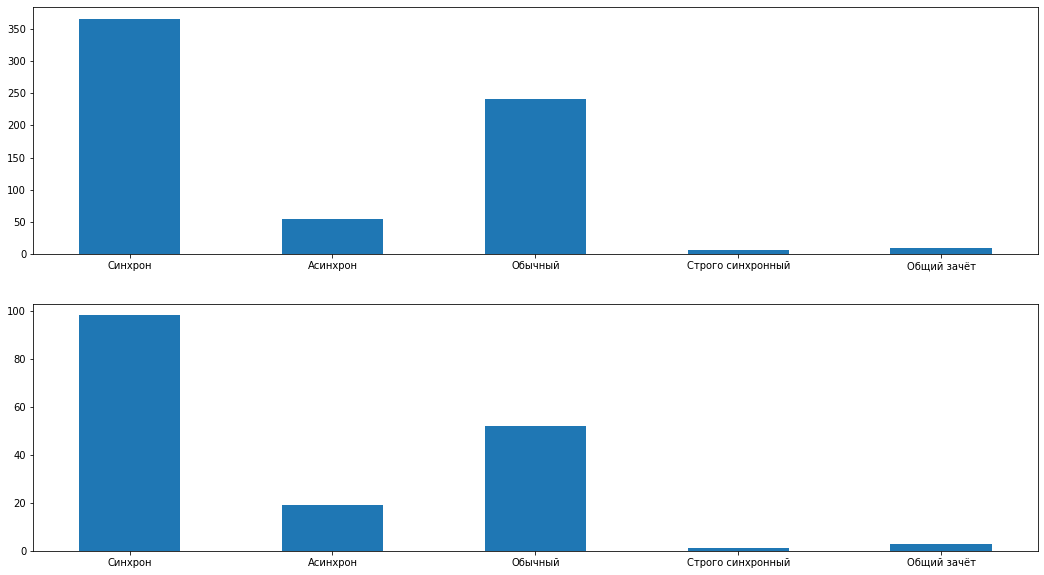

In [281]:
import matplotlib.pyplot as plt
fig, (plt1, plt2) = plt.subplots(nrows=2, ncols=1, figsize=(18,10))

x_2019 = type_tourn_2019.keys()
y_2019 = type_tourn_2019.values()

x_2020 = type_tourn_2020.keys()
y_2020 = type_tourn_2020.values()
plt1.bar(x_2019, y_2019, width = 0.5, label = '2019')
plt2.bar(x_2020, y_2020, width = 0.5, label = '2020')

In [282]:
type_tourn_2019

{'Асинхрон': 54,
 'Общий зачёт': 9,
 'Обычный': 241,
 'Синхрон': 365,
 'Строго синхронный': 6}

In [283]:
type_tourn_2020

{'Асинхрон': 19,
 'Общий зачёт': 3,
 'Обычный': 52,
 'Синхрон': 98,
 'Строго синхронный': 1}

In [0]:
#В тест добавляем 2020 год, в тренировочные данные - 2019 год

train_data, test_data = {}, {}
for id, tournament in results.items():
  y = int(tournaments[id]["dateStart"][0:4])
  
  if y == 2019:
    train_data[id] = {"tournament_name": tournaments[id]["name"]}
    team_results = []
    for team_result in tournament:
      team_info = {"team_id": team_result["team"]["id"], "mask": team_result["mask"], "position": team_result["position"],
        "teamMembers": [team_member["player"]["id"] for team_member in team_result['teamMembers']]}
      team_results.append(team_info)
    train_data[id]["tournament_result"] = team_results

  elif y == 2020:
    test_data[id] = {"tournament_name": tournaments[id]["name"]}
    team_results = []
    for team_result in tournament:
      team_info = {"team_id": team_result["team"]["id"], "mask": team_result["mask"], "position": team_result["position"],
        "teamMembers": [team_member["player"]["id"] for team_member in team_result['teamMembers']]}
      team_results.append(team_info)
    test_data[id]["tournament_result"] = team_results

In [0]:
user_id_dict_2019 = {}

for id, value in train_data.items():
  for j in range(len(train_data[id]['tournament_result'])):
    for k in train_data[id]['tournament_result'][j]['teamMembers']:
      user_id_dict_2019[k] = 0
for id, value in train_data.items():
  for j in range(len(train_data[id]['tournament_result'])):
    for k in train_data[id]['tournament_result'][j]['teamMembers']:
      user_id_dict_2019[k] += 1

In [286]:
x_train = user_id_dict_2019.values()
print(x_train)

dict_values([82, 95, 34, 51, 54, 27, 40, 59, 35, 44, 40, 46, 32, 29, 28, 22, 30, 39, 19, 45, 43, 37, 62, 39, 77, 16, 54, 43, 124, 100, 89, 111, 24, 11, 16, 100, 50, 97, 69, 68, 49, 98, 61, 107, 87, 12, 85, 21, 48, 60, 61, 48, 23, 23, 25, 18, 1, 111, 36, 38, 73, 40, 17, 31, 32, 29, 25, 1, 66, 78, 79, 75, 69, 46, 99, 90, 36, 63, 26, 21, 86, 58, 81, 50, 13, 20, 18, 17, 6, 11, 7, 13, 12, 14, 13, 9, 1, 116, 75, 118, 122, 54, 82, 61, 85, 80, 84, 109, 86, 91, 52, 10, 19, 10, 155, 162, 222, 160, 169, 179, 86, 28, 9, 93, 20, 29, 99, 70, 48, 51, 13, 11, 95, 66, 48, 1, 1, 35, 47, 47, 48, 43, 49, 85, 81, 83, 83, 22, 22, 49, 94, 103, 76, 84, 89, 130, 124, 78, 24, 45, 88, 90, 64, 80, 65, 51, 38, 109, 107, 50, 18, 30, 116, 86, 99, 104, 85, 86, 35, 35, 27, 9, 31, 5, 81, 198, 169, 161, 83, 66, 77, 55, 49, 38, 1, 1, 54, 49, 59, 76, 60, 69, 11, 21, 32, 8, 8, 26, 50, 42, 98, 25, 56, 53, 53, 47, 33, 37, 91, 106, 112, 104, 54, 63, 52, 87, 46, 57, 115, 61, 14, 4, 1, 79, 93, 35, 49, 57, 77, 84, 78, 44, 35, 36

(array([4.6921e+04, 5.0980e+03, 2.0850e+03, 1.5310e+03, 9.0400e+02,
        7.5100e+02, 4.6300e+02, 3.8500e+02, 2.2300e+02, 1.8100e+02,
        1.3400e+02, 1.1500e+02, 7.8000e+01, 6.4000e+01, 3.6000e+01,
        2.8000e+01, 3.6000e+01, 1.5000e+01, 1.1000e+01, 1.0000e+01,
        7.0000e+00, 7.0000e+00, 8.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([  1.        ,   8.53333333,  16.06666667,  23.6       ,
         31.13333333,  38.66666667,  46.2       ,  53.73333333,
         61.26666667,  68.8       ,  76.33333333,  83.86666667,
         91.4       ,  98.93333333, 106.46666667, 114.        ,
        121.53333333, 129.06666667, 136.6       , 144.13333333,
        151.66666667, 159.2       , 166.73333333, 174.26666667,
        181.8       , 189.33333333, 196.86666667, 204.4       ,
        211.93333333, 219.46666667, 227.        ]),
 <a list of 30 Patch objects>)

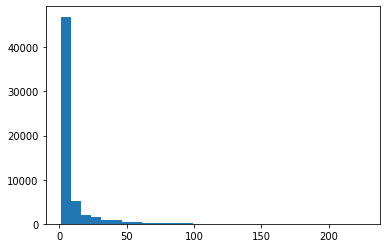

In [287]:
plt.hist(x_train, bins=30)

In [288]:
hist_zeros = np.zeros(51)
for i in x_train:
  if i < 51:
    hist_zeros[i] += 1

print(hist_zeros)

[    0. 20549.  9761.  5526.  4571.  2244.  1691.  1404.  1175.   920.
   844.   684.   685.   613.   491.   463.   398.   353.   341.   313.
   288.   295.   269.   226.   227.   228.   202.   192.   207.   162.
   165.   148.   140.   126.   139.   132.   144.   108.   115.   106.
   115.    98.   113.    81.    89.    78.    71.    79.    72.    71.
    67.]


Для предсказания новых участников (кого не было в 2019 году) нужно определить порог, кого из участников 2019 года включить в статистику для предсказания новых участников. Видим, что очень много участников участвовало всего 1 раз. Возьмем порогом 3 участия в ЧГК в 2019 году, и всех кто в 2019 году участвовал менее 4 раза будем называть ноунеймы - в одну статистику.

In [0]:
# присваиваем id = -1 для тех, кто мало играл в 2019 году(количество игр < 4 ) и новых игроков (кого не было на трейне, либо у них id = -1 )
for id, value in train_data.items():
  for j in range(len(train_data[id]['tournament_result'])):
    for k in range(len(train_data[id]['tournament_result'][j]['teamMembers'])):
       if (user_id_dict_2019[train_data[id]['tournament_result'][j]['teamMembers'][k]] < 4):
         train_data[id]['tournament_result'][j]['teamMembers'][k] = -1


In [0]:
for id, value in test_data.items():
  for j in range(len(test_data[id]['tournament_result'])):
    for k in range(len(test_data[id]['tournament_result'][j]['teamMembers'])):
      if ((test_data[id]['tournament_result'][j]['teamMembers'][k]  in user_id_dict_2019) and (user_id_dict_2019[test_data[id]['tournament_result'][j]['teamMembers'][k]] > 3)):
        continue
      else:
        test_data[id]['tournament_result'][j]['teamMembers'][k] = -1


In [0]:
tournaments_members_questions = set()
for id, tournament in train_data.items():
  for team in tournament["tournament_result"]:
    tournaments_members_questions.update(team["teamMembers"])
    questions_ids = (f"{id}_{question_num}" for question_num in range(len(team["mask"])))
    tournaments_members_questions.update(questions_ids)
tournaments_members_questions = {v: i for i, v in enumerate(tournaments_members_questions)}

In [0]:
def prepare_data(data, is_train, tournaments_members_questions):
  rows = []
  cols = []
  y = []
  current_row = 0
  for id, tournament in data.items():
    for team in tournament["tournament_result"]:
      for quest_numb, mask in enumerate(team["mask"]):
        try:
          y.extend([int(mask)] * len(team["teamMembers"]))
        except ValueError:
          continue
        for member in team["teamMembers"]:
          rows.append(current_row)
          cols.append(tournaments_members_questions[member])
          if is_train:    
            rows.append(current_row)
            cols.append(tournaments_members_questions[f"{id}_{quest_numb}"])
          current_row += 1
              
  rows = np.asarray(rows, dtype=np.int32)
  cols = np.asarray(cols, dtype=np.int32)
  data = np.ones(len(rows))
  y = np.asarray(y, dtype=np.int8)
      
  X = coo_matrix((data, (rows, cols)), shape=(len(y), len(tournaments_members_questions)))
  return X, y

X_train, y_train = prepare_data(data=train_data, is_train=True, tournaments_members_questions=tournaments_members_questions)
X_test, y_test = prepare_data(data=test_data, is_train=False, tournaments_members_questions=tournaments_members_questions)

# 2. Построение baseline-модели

Если команда отвечает верно, считаем что каждый игрок думает верно. Строим логистическу регрессию


In [293]:
from scipy.special import logit, expit
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import log_loss
from collections import defaultdict, Counter
from scipy.sparse import coo_matrix
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
predict_train = baseline_model.predict_proba(X_train)[:, 1]
predict_test = baseline_model.predict_proba(X_test)[:, 1]

print (log_loss(y_train, predict_train))
print (log_loss(y_test, predict_test))

0.505407365251145
0.6944184020037879


# 3. Качество рейтинг-системы

При построении данной модели делаем предположение что команда неправильно отвечает, если все игроки не знают правильного ответа, команда правильно отвечает - если хотя бы один игрок знает правильный ответ. То есть если qi - вероятность того что игрок ответит неверно, то вероятность верного ответа будет 1 - произведение (qi). Далее состовляем рейтинг с помощью сортировки команд по вероятности правильных ответов. 

In [0]:
tournament_id_2020 = []
team_id_2020 = []
positions_2020 = []
for id, tournament in test_data.items():
  for team in tournament["tournament_result"]:
    tournament_id_2020.append(id)
    team_id_2020.append(team["team_id"])
    positions_2020.append(team["position"])

positions_2020_t = pd.DataFrame.from_dict({
  'tournament_id': tournament_id_2020,
  'team_id': team_id_2020,
  'position_true': positions_2020,
})

In [0]:
answered_20 = []
tournament_id_20 = []
team_id_20 = []
for id, tournament in test_data.items():
  for team in tournament["tournament_result"]:
    team_id = team["team_id"]
    for answer in team["mask"]:
      try:
        answered_20.extend([int(answer)] * len(team["teamMembers"]))
        tournament_id_20.extend([id] * len(team["teamMembers"]))
        team_id_20.extend([team_id] * len(team["teamMembers"]))
      except ValueError:
        continue

tournament_id_20 = np.asarray(tournament_id_20, dtype=np.int32)
team_id_20 = np.asarray(team_id_20, dtype=np.int32)

In [0]:
predicted_positions = pd.DataFrame.from_dict({
  'tournament_id': tournament_id_20,
  'team_id': team_id_20,
  '1-predict': 1 - predict_test,
})
    
predicted_positions = predicted_positions.groupby(["tournament_id", "team_id"]).agg("prod").reset_index()
predicted_positions["position_pred"] = predicted_positions.groupby("tournament_id")["1-predict"].rank("dense")

In [298]:

from scipy.stats import kendalltau, spearmanr

merge = pd.merge(predicted_positions, positions_2020_t, on=["tournament_id", "team_id"])

kendall = []
spearman = []
tournam_ids = merge['tournament_id'].unique()

for tournam_id in tournam_ids:
  kendall += [kendalltau(merge[merge['tournament_id']==tournam_id]["position_pred"], merge[merge['tournament_id']==tournam_id]["position_true"]).correlation]
  spearman += [spearmanr(merge[merge['tournament_id']==tournam_id]["position_pred"], merge[merge['tournament_id']==tournam_id]["position_true"]).correlation] 

kendall = np.asarray(kendall)
spearman = np.asarray(spearman)
kendall[np.isnan(kendall)] = 0.0
spearman[np.isnan(spearman)] = 0.0

kendall_corr = np.mean(kendall)
spearman_corr = np.mean(spearman)
print ('Ранговые корреляции Спирмена и Кендалла равны', spearman_corr, 'и', kendall_corr)

Ранговые корреляции Спирмена и Кендалла равны 0.7417463410776662 и 0.5859358577143821


# 4. Разработка EM-схемы

Воспользуемся ЕМ схемой аналогичной обсуждаемой на лекции о сусликах в областях

In [0]:
answered_19 = []
tournament_id_2019 = []
team_id_2019 = []
player_ids_train = []
questions_train = []
for id, tournament in train_data.items():
  for team in tournament["tournament_result"]:
    team_id = team["team_id"]
    for question, answer in enumerate(team["mask"]):
      try:
          answered_19.extend([int(answer)] * len(team["teamMembers"]))
          tournament_id_2019.extend([id] * len(team["teamMembers"]))
          team_id_2019.extend([team_id] * len(team["teamMembers"]))
          questions_train.extend([question] * len(team["teamMembers"]))
      except ValueError:
          continue
      for member in team["teamMembers"]:
          player_ids_train.append(member)

tournament_id_2019 = np.asarray(tournament_id_2019, dtype=np.int32)
team_id_2019 = np.asarray(team_id_2019, dtype=np.int32)
questions_train = np.asarray(questions_train, dtype=np.int32)

In [301]:
for s in range(1, 11):
  df_em = pd.DataFrame.from_dict({
    'tournament_id': tournament_id_2019,
    'team_id': team_id_2019,
    'player_id': player_ids_train,
    'questions': questions_train,
    'predict': predict_train,
  })
  df_em["1-predict"] = 1 - df_em["predict"]

  df_team = df_em.drop(columns=["player_id", "predict"]).groupby(["tournament_id", "team_id", "questions"]).agg("prod").reset_index()
  df_team["team_predict"] = 1 - df_team["1-predict"]

  df_em = pd.merge(df_em.drop(columns="1-predict"), df_team.drop(columns="1-predict"), on=["tournament_id", "team_id", "questions"])
  df_em["z"] = df_em["predict"] / df_em["team_predict"]

  z = df_em["z"].values
  z = np.where(y_train == 0, 0, z)
  z = np.clip(z, 1e-6, 1 - 1e-6)
  
  model = Ridge(alpha=5, solver="auto", tol=0.0001)
  model.fit(X_train, logit(z))
  predict_train = expit(model.predict(X_train))
  predict_test = expit(model.predict(X_test))

  predicted_positions = pd.DataFrame.from_dict({
    'tournament_id': tournament_id_20,
    'team_id': team_id_20,
    '1-predict': 1 - predict_test,
    })
      
  predicted_positions = predicted_positions.groupby(["tournament_id", "team_id"]).agg("prod").reset_index()
  predicted_positions["position_pred"] = predicted_positions.groupby("tournament_id")["1-predict"].rank("dense")

  merge = pd.merge(predicted_positions, positions_2020_t, on=["tournament_id", "team_id"])

  kendall = []
  spearman = []
  tournam_ids = merge['tournament_id'].unique()

  for tournam_id in tournam_ids:
    kendall += [kendalltau(merge[merge['tournament_id']==tournam_id]["position_pred"], merge[merge['tournament_id']==tournam_id]["position_true"]).correlation]
    spearman += [spearmanr(merge[merge['tournament_id']==tournam_id]["position_pred"], merge[merge['tournament_id']==tournam_id]["position_true"]).correlation] 

  kendall = np.asarray(kendall)
  spearman = np.asarray(spearman)
  kendall[np.isnan(kendall)] = 0.0
  spearman[np.isnan(spearman)] = 0.0

  kendall_corr = np.mean(kendall)
  spearman_corr = np.mean(spearman)

  print(f"EM шаг № {s} корреляция Кендалла - {kendall_corr}, корреляция Спирмена: {spearman_corr}\n ")

EM шаг № 1 корреляция Кендалла - 0.626849272557681, корреляция Спирмена: 0.7787971438247816
 
EM шаг № 2 корреляция Кендалла - 0.6267676045278617, корреляция Спирмена: 0.7787024604166216
 
EM шаг № 3 корреляция Кендалла - 0.6268223606450427, корреляция Спирмена: 0.7787635607031912
 
EM шаг № 4 корреляция Кендалла - 0.6268346288102424, корреляция Спирмена: 0.7787584699225096
 
EM шаг № 5 корреляция Кендалла - 0.626859461388166, корреляция Спирмена: 0.7787982426916198
 
EM шаг № 6 корреляция Кендалла - 0.6269113053728051, корреляция Спирмена: 0.778752817621373
 
EM шаг № 7 корреляция Кендалла - 0.6268832025516212, корреляция Спирмена: 0.7786565505317719
 
EM шаг № 8 корреляция Кендалла - 0.6267611763124832, корреляция Спирмена: 0.7785803080629774
 
EM шаг № 9 корреляция Кендалла - 0.6267596910621808, корреляция Спирмена: 0.7785653021878486
 
EM шаг № 10 корреляция Кендалла - 0.6266493140116449, корреляция Спирмена: 0.7783782036430467
 


In [329]:
predicted_positions[(predicted_positions['team_id']==2) and (predicted_positions['tournament_id']==4957)]

ValueError: ignored

In [334]:
train_data[4772]['tournament_result'][1]['mask']

'111111111011110100101111011001011010'

In [335]:
len(train_data[4772]['tournament_result'][1]['mask'])

36

In [367]:
tourn_weigh = predicted_positions[predicted_positions['team_id']==test_data[4957]['tournament_result'][2]['team_id']][predicted_positions['tournament_id']==id]
reit = 1 - float(tourn_weigh['1-predict'])
k = 5 - reit * 7
k


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


-0.7188174057303014

# 5. Рейтинг турниров по сложности

In [369]:
tournament_weight = {}
for id, tournaments in test_data.items():
  tournament_weight[test_data[id]['tournament_name']] = 0.0
  n = len(test_data[id]['tournament_result'])
  sum_w = 0.0
  
  for i in range(n):
    s = test_data[id]['tournament_result'][i]['mask']
    n_quest = len(s)
    true_quest = 0
    for k in range(n_quest):
      if s[k] == '1':
        true_quest += 1
    tourn_weigh = predicted_positions[predicted_positions['team_id']==test_data[id]['tournament_result'][i]['team_id']][predicted_positions['tournament_id']==id]
    reit = 1 - float(tourn_weigh['1-predict'])
    sum_w += (n_quest - true_quest) * reit / n_quest
     
  sum_w = sum_w / n
  tournament_weight[test_data[id]['tournament_name']] = sum_w

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [374]:
list_weight = list(tournament_weight.items())
list_weight.sort(key=lambda i: i[1])
print('Турниры с простыми вопросами:')
for i in range(10):
  print(list_weight[i])

Турниры с простыми вопросами:
('Покорение Сибири. День 1', 0.002980461286370557)
('Интеллектуальная олимпиада ПФО среди студентов. Региональный этап', 0.003060506185525926)
('Интеллектуальная олимпиада ПФО среди школьников. Региональный этап', 0.004122446937185262)
('Покорение Сибири. День 2', 0.00427574030886124)
('Школьная лига. V тур.', 0.004707298734339247)
('Школьный Синхрон-lite. Выпуск 3.6', 0.0054033060518877815)
('(а)Синхрон-lite. Лига старта. Эпизод XII', 0.005450792139455098)
('Школьная лига. IV тур.', 0.005792995482415299)
('Школьная лига. VI тур.', 0.005970151432962141)
('Студенческий чемпионат Ярославской области', 0.0061561232519881616)


In [377]:
print('Турниры со сложными вопросами:')
for i in range(8):
  print(list_weight[-1-i])

Турниры со сложными вопросами:
('Славянка', 0.3393352263982955)
('Мемориал Дмитрия Коноваленко', 0.29747004915086794)
('Кавалькада волхвов', 0.24298688971531562)
('Случайному гостю', 0.2378103777219269)
('Олимпийский Кубок Беларуси', 0.23536796778259797)
('ФранкенШТО', 0.2190768861345625)
('Синхрон Биркиркары', 0.21065552483464905)
('VERSUS: Немец vs. Шагал', 0.2089587729750228)


Видим что школьные турниры отнесены к простым турнирам, а турниры типа кубка страны к сложным